In [1]:
import os 

In [2]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_location = ".\disease_prediction_ml"
train_data_location_name = f"{file_location}\Training.csv"
test_data_location_name = f"{file_location}\Testing.csv"


In [4]:
# Load the data 
# We're loading both training and testing data to see what we have to work with

# Load Train Data
train_data = pd.read_csv(train_data_location_name)
print(train_data.shape)
# Load Test Data
test_data = pd.read_csv(test_data_location_name)
print(test_data.shape)

(4920, 134)
(42, 133)


In [ ]:
# Lets visually explore the train data

train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
# Lets visually explore the test data

test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
# Data Cleaning: The train data has an extra column and must be removed

# Schema Change
train_data.drop('Unnamed: 133', axis=1, inplace=True) 
train_data["prognosis"].str.strip()

# Lets preview the test data to confirm the column has been removed
train_data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
# Upon inspection it looks like test_data only has one observation per prognosis. Hence, it is not useful for ML purposes. 

# Decision: We have made the decision to combine the test and train and later use train_test_split from scikit_learn

union_df_reset_index = pd.concat([train_data, test_data], ignore_index=True)

In [9]:
# Remove the trailing whitespaces
union_df_reset_index["prognosis"] = union_df_reset_index["prognosis"].str.strip()

# Filter for the specific data
filtered = union_df_reset_index[union_df_reset_index['prognosis'].isin(['Heart attack', 'Tuberculosis', 'Pneumonia','GERD'])].copy()

# Check out the shape of the dataframe
print(f"Train data shape{filtered.shape}")


Train data shape(484, 133)


In [ ]:
# Import required scikit_learn packages

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [11]:
# Define symptom columns (all columns except 'prognosis')
symptom_columns = [col for col in filtered.columns if col != 'prognosis']
print(f"\nNumber of symptom columns: {len(symptom_columns)}")


Number of symptom columns: 132


In [ ]:
# Lets define and X and y for the models.

X = filtered[symptom_columns] # Features
y = filtered['prognosis'] # Labels
print(y)

20              GERD
21              GERD
22              GERD
23              GERD
24              GERD
            ...     
4908    Heart attack
4922            GERD
4945    Tuberculosis
4947       Pneumonia
4949    Heart attack
Name: prognosis, Length: 484, dtype: object


In [ ]:
# We need to encode the categorical variables

label_encoder= LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Here we will split the data in train and test. 
# stratify=y_encoded in the function parameter ensures class proportions are maintained in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Lets confirm the train and test split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nPrognosis distribution in training set:")
train_prognosis_counts = pd.Series(y_train).map(lambda x: label_encoder.inverse_transform([x])[0]).value_counts(normalize=True)
print(train_prognosis_counts)

print("\nPrognosis distribution in test set:")
test_prognosis_counts = pd.Series(y_test).map(lambda x: label_encoder.inverse_transform([x])[0]).value_counts(normalize=True)
print(test_prognosis_counts)


Shape of X_train: (387, 132)
Shape of X_test: (97, 132)
Shape of y_train: (387,)
Shape of y_test: (97,)

Prognosis distribution in training set:
Tuberculosis    0.250646
Heart attack    0.250646
GERD            0.250646
Pneumonia       0.248062
Name: proportion, dtype: float64

Prognosis distribution in test set:
Pneumonia       0.257732
GERD            0.247423
Tuberculosis    0.247423
Heart attack    0.247423
Name: proportion, dtype: float64


In [15]:
# Initialize the Random Forest Classifier
# n_estimators: Number of trees in the forest. A higher number generally improves performance.
# random_state: For reproducibility.
# class_weight='balanced': Addresses potential class imbalance by giving more weight to minority classes.
rf_model = RandomForestClassifier(
    n_estimators=200,      # A common starting point, can be tuned
    random_state=42,
    class_weight='balanced',
    max_features='sqrt',   # Number of features to consider when looking for the best split
    min_samples_leaf=5     # Minimum number of samples required to be at a leaf node
)

print("Training Random Forest Classifier...")
rf_model.fit(X_train, y_train)
print("Random Forest Classifier training complete!")
rf_model

Training Random Forest Classifier...
Random Forest Classifier training complete!


RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       n_estimators=200, random_state=42)

In [16]:
# y_pred will be numerical (encoded labels)
y_pred = rf_model.predict(X_test)

In [ ]:
# Reverse encode the labels back

y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred) # y_pred from model.predict is always numerical

In [18]:
# Measuring Accuracy of the Model
# Accuracy Score
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"\nAccuracy Score: {accuracy:.4f}")


Accuracy Score: 1.0000


In [19]:
# 2. Confusion Matrix
# Ensure labels are in the correct order for the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)
print("\nConfusion Matrix:")
# Display with row/column labels for better understanding
conf_matrix_df = pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)
print(conf_matrix_df)


Confusion Matrix:
              GERD  Heart attack  Pneumonia  Tuberculosis
GERD            24             0          0             0
Heart attack     0            24          0             0
Pneumonia        0             0         25             0
Tuberculosis     0             0          0            24


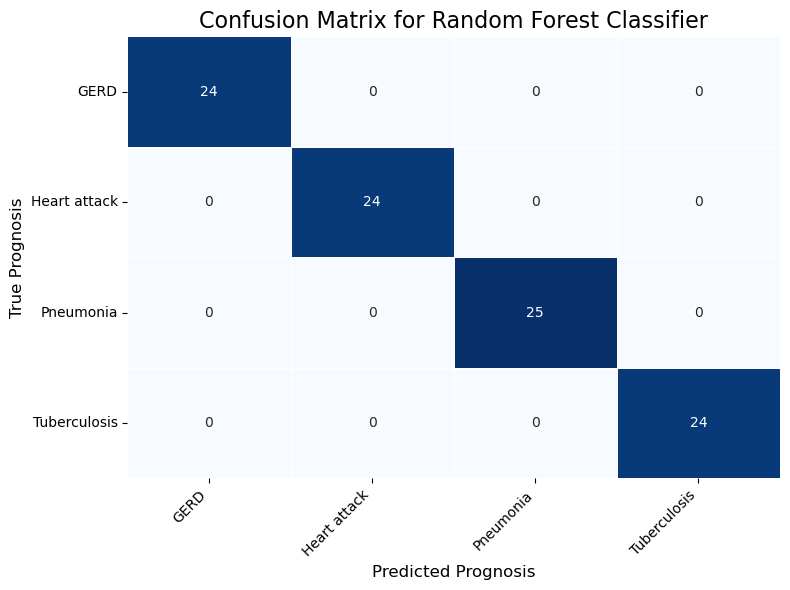

In [20]:
# Visualize Confusion Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5)
plt.title('Confusion Matrix for Random Forest Classifier', fontsize=16)
plt.xlabel('Predicted Prognosis', fontsize=12)
plt.ylabel('True Prognosis', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [21]:
# Visualize Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

        GERD       1.00      1.00      1.00        24
Heart attack       1.00      1.00      1.00        24
   Pneumonia       1.00      1.00      1.00        25
Tuberculosis       1.00      1.00      1.00        24

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97

